# Explore here

In [4]:
import os
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


In [7]:
#Daddy yankee
artist_id = "4VMYDCV2IEDYJArk749S6m"

response = con.artist_top_tracks(artist_id)
print(response)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4VMYDCV2IEDYJArk749S6m'}, 'href': 'https://api.spotify.com/v1/artists/4VMYDCV2IEDYJArk749S6m', 'id': '4VMYDCV2IEDYJArk749S6m', 'name': 'Daddy Yankee', 'type': 'artist', 'uri': 'spotify:artist:4VMYDCV2IEDYJArk749S6m'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'C

In [31]:
if response:
    tracks = response['tracks']

print(tracks[0]['artists'][0]['name'])

tracks1 = [{k:(v/(1000*60)%60) if k == 'duration_ms' else v for k,v in track.items() if k in ['name', 'popularity','duration_ms']} for track in tracks]

print(tracks1)

Daddy Yankee
[{'duration_ms': 3.21, 'name': 'Gasolina', 'popularity': 63}, {'duration_ms': 3.8226666666666667, 'name': 'Despacito', 'popularity': 78}, {'duration_ms': 3.51555, 'name': 'Lo Que Pasó, Pasó', 'popularity': 62}, {'duration_ms': 3.4403333333333332, 'name': 'La Santa', 'popularity': 78}, {'duration_ms': 3.425333333333333, 'name': 'Tu Príncipe', 'popularity': 58}, {'duration_ms': 4.4347666666666665, 'name': 'Soltera (Remix)', 'popularity': 74}, {'duration_ms': 3.2204333333333333, 'name': 'Con Calma', 'popularity': 76}, {'duration_ms': 3.49155, 'name': 'Ella Me Levantó', 'popularity': 60}, {'duration_ms': 3.3804333333333334, 'name': 'La Despedida', 'popularity': 59}, {'duration_ms': 3.998666666666667, 'name': 'Llamado de Emergencia', 'popularity': 75}]


In [28]:
tracks2 = []
for track in tracks:
    cancion = {}
    for k,v in track.items():
        if k in ["name","popularity","duration_ms"]:
            if k == "duration_ms":
                v = v/(1000*60)%60
            cancion[k] = v
    tracks2.append(cancion)

print(tracks2)     

[{'duration_ms': 3.21, 'name': 'Gasolina', 'popularity': 63}, {'duration_ms': 3.8226666666666667, 'name': 'Despacito', 'popularity': 78}, {'duration_ms': 3.51555, 'name': 'Lo Que Pasó, Pasó', 'popularity': 62}, {'duration_ms': 3.4403333333333332, 'name': 'La Santa', 'popularity': 78}, {'duration_ms': 3.425333333333333, 'name': 'Tu Príncipe', 'popularity': 58}, {'duration_ms': 4.4347666666666665, 'name': 'Soltera (Remix)', 'popularity': 74}, {'duration_ms': 3.2204333333333333, 'name': 'Con Calma', 'popularity': 76}, {'duration_ms': 3.49155, 'name': 'Ella Me Levantó', 'popularity': 60}, {'duration_ms': 3.3804333333333334, 'name': 'La Despedida', 'popularity': 59}, {'duration_ms': 3.998666666666667, 'name': 'Llamado de Emergencia', 'popularity': 75}]


In [33]:
tracks_df = pd.DataFrame.from_records(tracks2)
tracks_df 

,duration_ms,name,popularity
0,3.210000,Gasolina,63
1,3.822667,Despacito,78
2,3.515550,"Lo Que Pasó, Pasó",62
3,3.440333,La Santa,78
4,3.425333,Tu Príncipe,58
5,4.434767,Soltera (Remix),74
6,3.220433,Con Calma,76
7,3.491550,Ella Me Levantó,60
8,3.380433,La Despedida,59
9,3.998667,Llamado de Emergencia,75


In [39]:
tracks_df.sort_values(["popularity"], inplace=True, ascending=False)
tracks_df

,duration_ms,name,popularity
3,3.440333,La Santa,78
1,3.822667,Despacito,78
6,3.220433,Con Calma,76
9,3.998667,Llamado de Emergencia,75
5,4.434767,Soltera (Remix),74
0,3.210000,Gasolina,63
2,3.515550,"Lo Que Pasó, Pasó",62
7,3.491550,Ella Me Levantó,60
8,3.380433,La Despedida,59
4,3.425333,Tu Príncipe,58


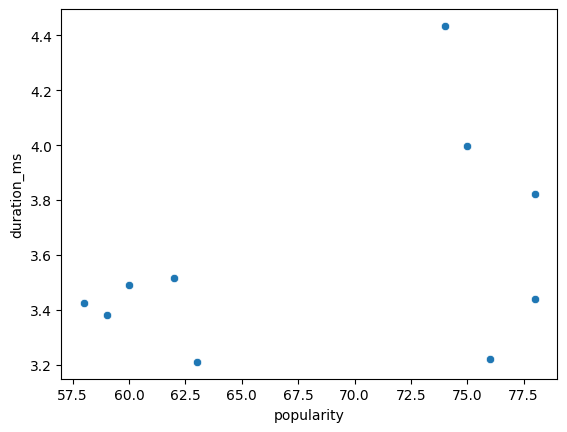

In [38]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x="popularity", y="duration_ms")

fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")